<a href="https://colab.research.google.com/github/ShubhangiRaibole/Basic-kanban/blob/master/Data_Epilepsy_SZONF_and_targetS_Z_O_N_F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np 
#for data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#for evaluation
from sklearn.metrics import mean_absolute_error, r2_score, classification_report,confusion_matrix , accuracy_score, f1_score
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_excel('/content/data_epilepsy.xlsx',sheet_name='SZONF')
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,...,Unnamed: 4057,Unnamed: 4058,Unnamed: 4059,Unnamed: 4060,Unnamed: 4061,Unnamed: 4062,Unnamed: 4063,Unnamed: 4064,Unnamed: 4065,Unnamed: 4066,Unnamed: 4067,Unnamed: 4068,Unnamed: 4069,Unnamed: 4070,Unnamed: 4071,Unnamed: 4072,Unnamed: 4073,Unnamed: 4074,Unnamed: 4075,Unnamed: 4076,Unnamed: 4077,Unnamed: 4078,Unnamed: 4079,Unnamed: 4080,Unnamed: 4081,Unnamed: 4082,Unnamed: 4083,Unnamed: 4084,Unnamed: 4085,Unnamed: 4086,Unnamed: 4087,Unnamed: 4088,Unnamed: 4089,Unnamed: 4090,Unnamed: 4091,Unnamed: 4092,Unnamed: 4093,Unnamed: 4094,Unnamed: 4095,Unnamed: 4096
0,100,124,153,185,210,220,216,222,240,265,298,330,362,381,391,390,390,392,395,397,397,393,380,356,334,322,320,322,338,332,317,263,195,142,108,97,80,80,85,39,...,516,592,650,667,637,574,505,450,413,399,414,448,486,449,291,-46,-457,-878,-1178,-1324,-1310,-1105,-770,-345,42,315,465,513,478,378,250,137,57,17,0,7,26,57,95,462
1,340,353,400,470,538,590,611,629,649,693,759,837,812,684,389,-231,-1250,-1768,-1816,-1637,-984,-476,-224,-14,165,314,408,454,467,437,412,379,376,339,302,248,200,174,144,152,...,304,254,82,-174,-467,-537,-450,-178,64,274,464,496,571,467,299,130,28,82,270,597,886,1071,1166,1146,1000,773,423,118,-75,-18,205,556,824,919,916,829,722,512,130,196
2,-310,93,494,789,798,552,202,-95,-262,-327,-420,-483,-508,-502,-459,-376,-266,-113,18,98,135,154,163,174,186,196,208,216,218,208,200,197,197,201,211,224,239,246,252,261,...,-21,-12,29,75,111,145,168,169,150,113,106,137,204,291,388,477,546,574,546,467,360,255,164,123,126,184,312,410,470,496,437,345,108,-216,-525,-735,-847,-721,-491,910
3,84,75,21,-68,-138,-184,-197,-186,-155,-111,-58,-26,-18,-18,-40,-56,-35,35,149,253,298,282,232,161,96,71,64,70,35,-45,-116,-169,-192,-196,-173,-131,-82,-38,-8,-4,...,-91,-191,-246,-261,-248,-228,-197,-172,-150,-133,-123,-113,-109,-93,-71,-54,-42,-32,-17,29,110,200,271,285,236,142,50,-15,-61,-83,-119,-148,-171,-195,-218,-234,-238,-209,-165,-212
4,343,311,284,274,260,237,165,-33,-271,-425,-418,-254,-104,-14,16,24,23,11,4,20,40,67,99,127,130,126,133,124,108,54,-5,-45,-61,-65,-52,-46,-25,-15,-4,-12,...,2,-70,-118,-155,-201,-283,-368,-363,-333,-271,-203,-126,-31,48,86,102,124,125,132,144,187,263,343,411,433,417,397,395,414,435,439,428,423,430,472,515,527,480,397,217


In [ ]:
target = pd.read_excel('/content/data_epilepsy.xlsx',sheet_name='targetS-Z-O-N-F')

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
scaled_data = scaler.transform(df)

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=3)

In [ ]:
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
x_pca = pca.transform(scaled_data)

In [ ]:
scaled_data.shape

(500, 4097)

In [ ]:
x_pca.shape

(500, 3)

Text(0, 0.5, 'Second principal component')

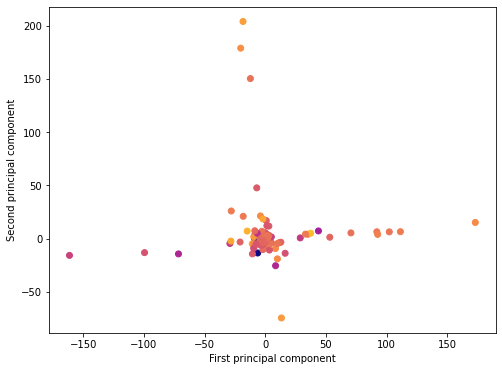

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=df['Unnamed: 18'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second principal component')

In [ ]:
x=df.iloc[:,0:]
y=target

In [ ]:
from sklearn.model_selection import train_test_split
x_Train,x_Test,y_Train,y_Test =train_test_split(x,y,train_size =.8)

#DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()

In [ ]:
from sklearn.utils.multiclass import is_multilabel

In [ ]:
model.fit(x_Train,y_Train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
# Necessary imports
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

# Creating the hyperparameter grid 
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 7),
              "min_samples_leaf": randint(1, 7),
              "criterion": ["gini", "entropy"]}

# Instantiating Decision Tree classifier
tree = DecisionTreeClassifier()


# Instantiating RandomizedSearchCV object
tree_cv = RandomizedSearchCV(tree, param_dist, cv = 5)

tree_cv.fit(x_Train, y_Train)
  
# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 2, 'min_samples_leaf': 4}
Best score is 0.4074999999999999


In [ ]:
y_pred = tree_cv.predict(x_Test)
y_pred

array([3, 2, 0, 2, 0, 0, 3, 1, 3, 3, 0, 2, 1, 0, 4, 2, 0, 2, 4, 2, 1, 0,
       2, 3, 2, 3, 3, 1, 2, 3, 1, 2, 0, 1, 0, 2, 0, 1, 3, 3, 3, 4, 3, 3,
       0, 1, 0, 1, 3, 4, 3, 1, 2, 1, 1, 4, 2, 2, 2, 3, 3, 0, 2, 2, 3, 2,
       3, 0, 3, 3, 1, 0, 1, 2, 3, 1, 0, 3, 3, 3, 3, 4, 1, 0, 1, 1, 2, 2,
       4, 0, 0, 2, 0, 1, 3, 2, 2, 0, 1, 1])

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_Test,y_pred))

0.4


In [ ]:
dtc_acc = accuracy_score(y_Test,y_pred)
print(dtc_acc)

0.4


In [ ]:
results = pd.DataFrame()
results

""


In [ ]:
tempResults = pd.DataFrame({'Algorithm':['Decision tree Classifier Method'],'Accuracy':[dtc_acc]})
results = pd.concat( [results, tempResults] )
results = results[['Algorithm','Accuracy']]
results

,Algorithm,Accuracy
0,Decision tree Classifier Method,0.4


##Logistic Regression

In [ ]:
# Necessary imports
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Creating the hyperparameter grid
c_space = np.logspace(-5, 9, 13)
param_grid = {'C': c_space}

# Instantiating logistic regression classifier
logreg = LogisticRegression()
  
# Instantiating the GridSearchCV object
logreg_cv = GridSearchCV(logreg, param_grid, cv = 6)
  
logreg_cv.fit(x_Train, y_Train)
  
# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))


Tuned Logistic Regression Parameters: {'C': 100.0}
Best score is 0.5676918438112467


In [ ]:
y_pred = logreg_cv.predict(x_Test)

In [ ]:
y_pred

array([1, 2, 3, 4, 4, 4, 3, 1, 4, 2, 0, 2, 0, 2, 4, 4, 0, 2, 4, 3, 4, 0,
       3, 0, 4, 4, 3, 3, 4, 3, 4, 1, 0, 4, 3, 1, 4, 4, 4, 1, 3, 3, 2, 3,
       1, 1, 3, 0, 3, 4, 2, 3, 1, 1, 4, 3, 1, 4, 3, 2, 4, 0, 0, 3, 2, 2,
       0, 4, 4, 3, 3, 2, 0, 0, 0, 3, 0, 2, 3, 4, 1, 4, 3, 2, 0, 0, 3, 0,
       3, 4, 0, 1, 3, 3, 1, 2, 4, 0, 1, 2])

In [ ]:
y_Test

,target
184,0
299,2
126,0
393,3
141,0
...,...
258,2
437,4
378,3
80,1


In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_Test, y_pred))

0.44


In [ ]:
lr_acc = accuracy_score(y_Test, y_pred)
print(lr_acc)

0.44


In [ ]:
tempResults = pd.DataFrame({'Algorithm':['Logistic Regression Method'], 'Accuracy':[lr_acc]})
results = pd.concat( [results, tempResults] )
results = results[['Algorithm','Accuracy']]
results

,Algorithm,Accuracy
0,Decision tree Classifier Method,0.40
0,Logistic Regression Method,0.44


#SVM-Linear

In [ ]:
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(x_Train, y_Train)

#Predict the response for test dataset
y_pred = clf.predict(x_Test)

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_Test, y_pred)
cm

array([[11,  0, 16,  1,  5],
       [ 5,  5,  3,  3,  3],
       [ 7,  0,  5,  2,  0],
       [ 4,  0,  0, 12,  2],
       [ 1,  0,  0,  1, 14]])

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_Test,y_pred))

0.47


In [ ]:
svm_lin_acc = accuracy_score(y_Test,y_pred)
print(svm_lin_acc)

0.47


In [ ]:
tempResults = pd.DataFrame({'Algorithm':['SVM-Linear Karnel Classifier Method'], 'Accuracy':[svm_lin_acc]})
results = pd.concat( [results, tempResults] )
results = results[['Algorithm','Accuracy']]
results

,Algorithm,Accuracy
0,Decision tree Classifier Method,0.40
0,Logistic Regression Method,0.44
0,SVM-Linear Karnel Classifier Method,0.47


##RandomForest

In [ ]:
 from sklearn.ensemble import RandomForestClassifier
 from sklearn.datasets import make_classification
xTrain, yTrain = make_classification(n_samples=1000, n_features=4097,
                            n_informative=2, n_redundant=0,
                            random_state=0, shuffle=False)
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(xTrain, yTrain)
RandomForestClassifier(...)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=Ellipsis,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
RandomForestClassifier(max_depth=2, random_state=0)
print(clf.feature_importances_)

[0.00878617 0.01414803 0.         ... 0.         0.         0.        ]


In [ ]:
y_pred = clf.predict(x_Test)
y_pred

array([0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0])

In [ ]:
accuracy_score(y_Test, y_pred)

0.26

In [ ]:
rfc_acc = accuracy_score(y_Test,y_pred)
print(rfc_acc)

0.26


In [ ]:
tempResults = pd.DataFrame({'Algorithm':['Random Forest Classifier Method'], 'Accuracy':[rfc_acc]})
results = pd.concat( [results, tempResults] )
results = results[['Algorithm','Accuracy']]
results

,Algorithm,Accuracy
0,Decision tree Classifier Method,0.40
0,Logistic Regression Method,0.44
0,SVM-Linear Karnel Classifier Method,0.47
0,Random Forest Classifier Method,0.26


#KNN

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
#making the instance
model = KNeighborsClassifier(n_jobs=-1)
#Hyper Parameters Set
params = {'n_neighbors':[9,10,11,12,13,14],
          'leaf_size':[5,6,7,8,9],
          'weights':['uniform', 'distance'],
          'algorithm':['auto', 'ball_tree','kd_tree','brute'],
          'n_jobs':[-1]}
#Making models with hyper parameters sets
model1 = GridSearchCV(model, param_grid=params, n_jobs=1)
#Learning
model1.fit(x_Train, y_Train)
#The best hyper parameters set
print("Best Hyper Parameters:\n",model1.best_params_)

Best Hyper Parameters:
 {'algorithm': 'auto', 'leaf_size': 5, 'n_jobs': -1, 'n_neighbors': 14, 'weights': 'distance'}


In [ ]:
# Predicting the Test set results
y_pred = model1.predict(x_Test)

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_Test, y_pred)
cm

array([[ 4,  0,  0, 13, 16],
       [ 4,  0,  0,  3, 12],
       [ 5,  0,  0,  5,  4],
       [ 2,  0,  0, 13,  3],
       [ 1,  0,  0,  8,  7]])

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_Test, y_pred))

0.24


In [ ]:
knn_acc = accuracy_score(y_Test, y_pred)
print(knn_acc)

0.24


In [ ]:
tempResults = pd.DataFrame({'Algorithm':['KNN Classifier Method'], 'Accuracy':[knn_acc]})
results = pd.concat( [results, tempResults] )
results = results[['Algorithm','Accuracy']]
results

,Algorithm,Accuracy
0,Decision tree Classifier Method,0.40
0,Logistic Regression Method,0.44
0,SVM-Linear Karnel Classifier Method,0.47
0,Random Forest Classifier Method,0.26
0,KNN Classifier Method,0.24


# Use silhouette_Coffeceint to Find best No of Cluster

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.6809292402766745


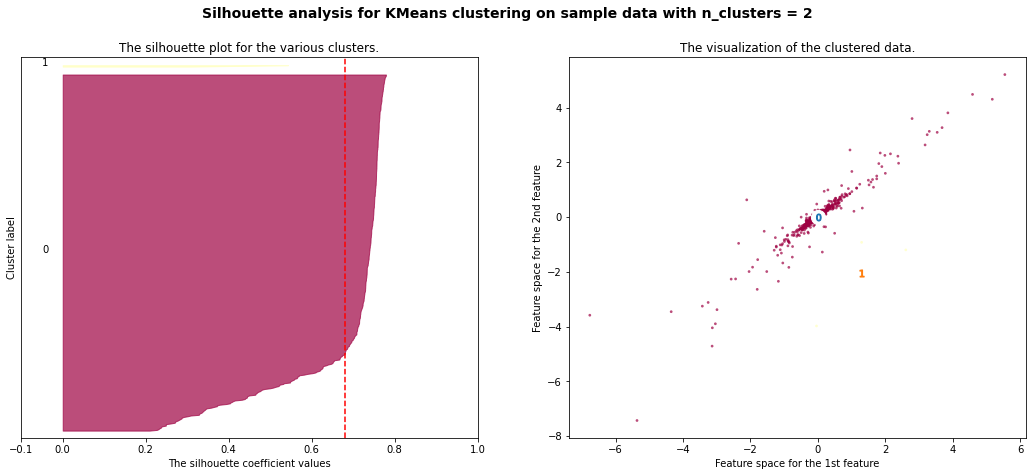

For n_clusters = 3 The average silhouette_score is : 0.6820945383231528


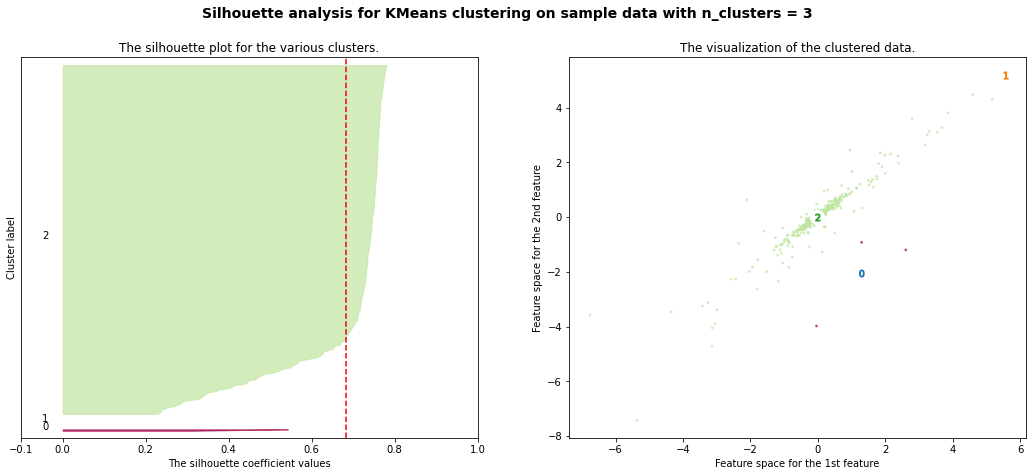

For n_clusters = 4 The average silhouette_score is : 0.6205304397894899


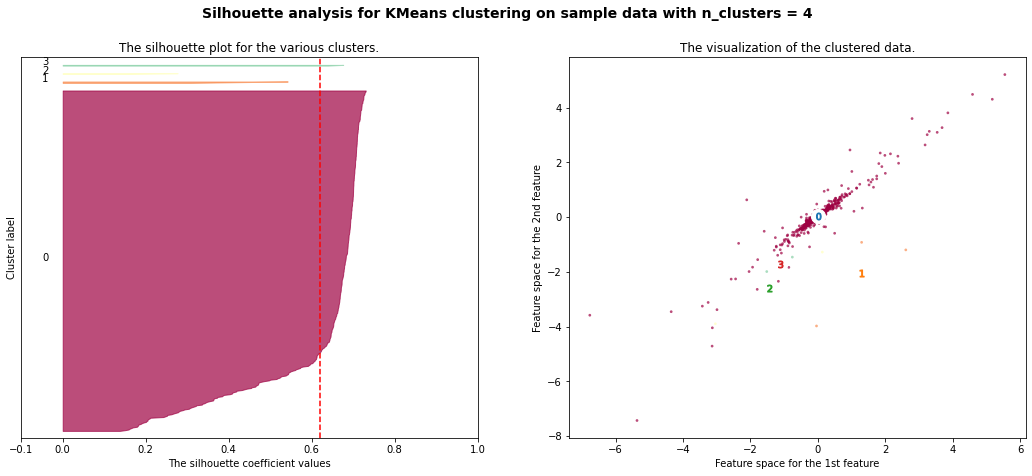

For n_clusters = 5 The average silhouette_score is : 0.6229467489021283


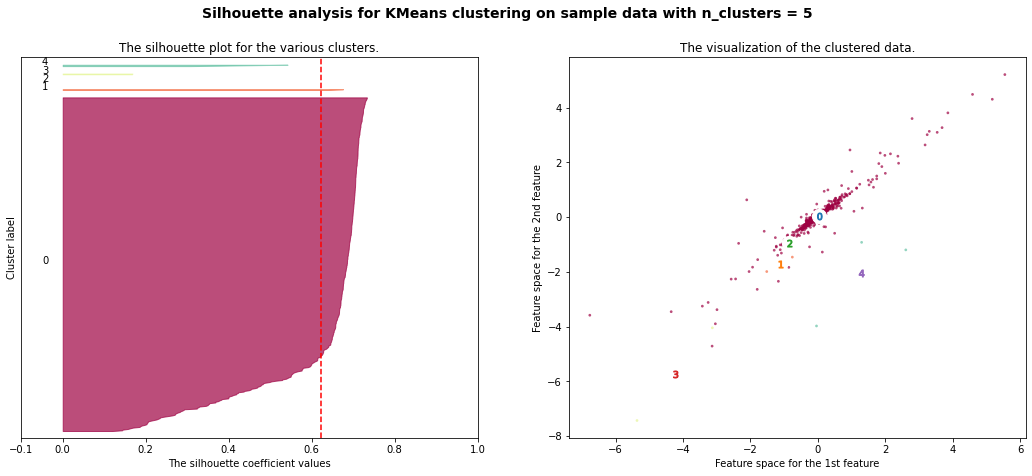

For n_clusters = 6 The average silhouette_score is : 0.6796452595841564


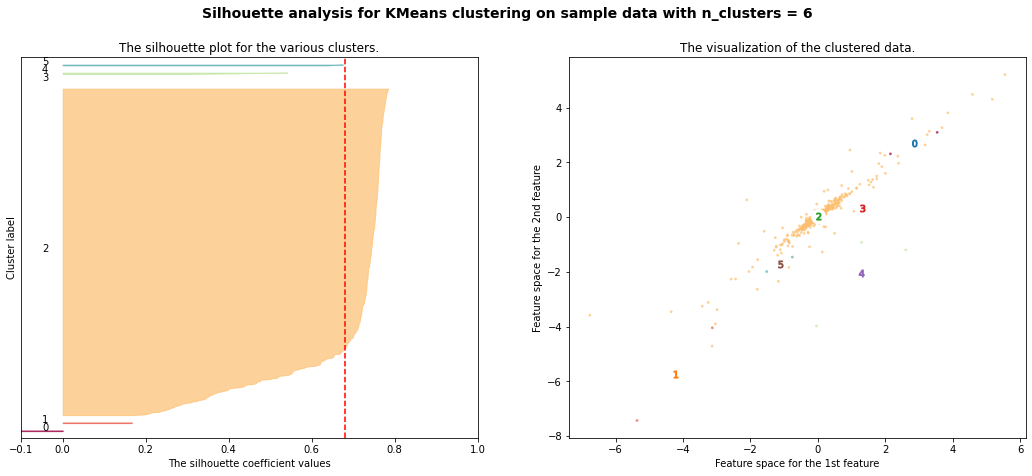

For n_clusters = 7 The average silhouette_score is : 0.627131161229227


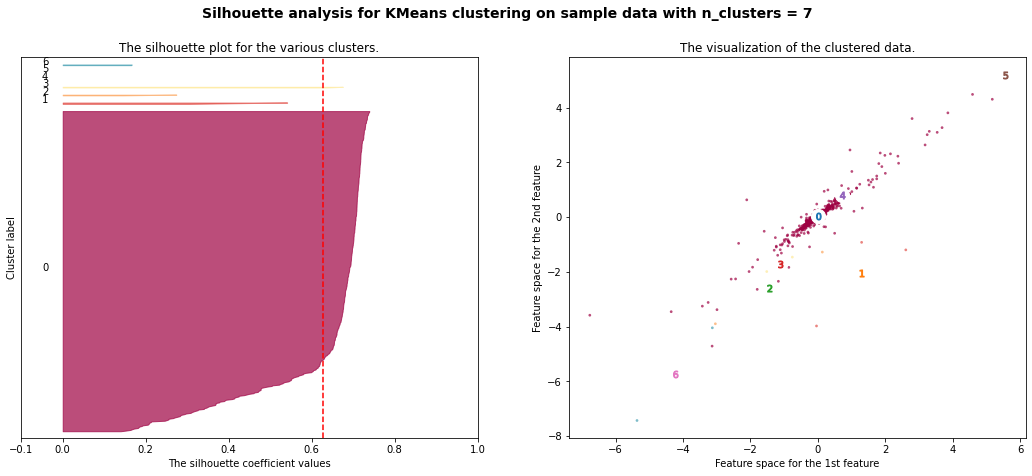

For n_clusters = 8 The average silhouette_score is : 0.6265584828312823


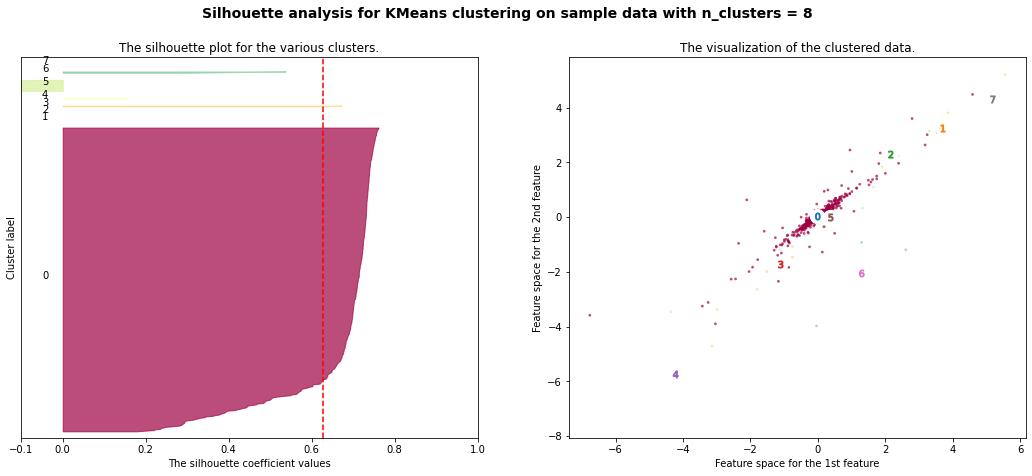

For n_clusters = 9 The average silhouette_score is : 0.5474594034686012


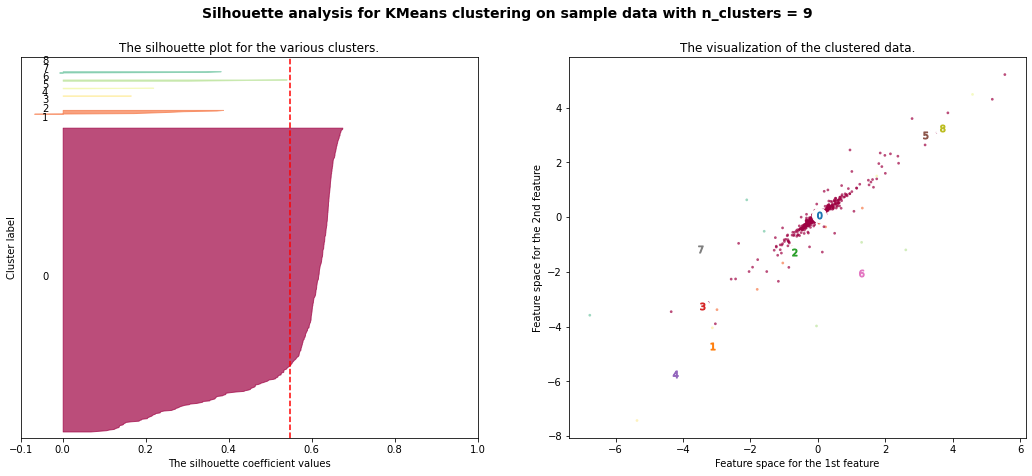

For n_clusters = 10 The average silhouette_score is : 0.5501402335210995


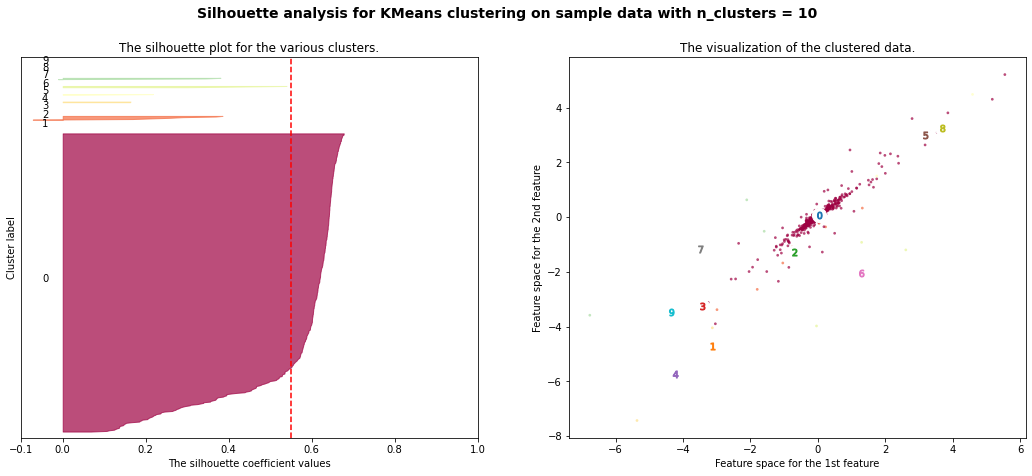

For n_clusters = 11 The average silhouette_score is : 0.4489153072790085


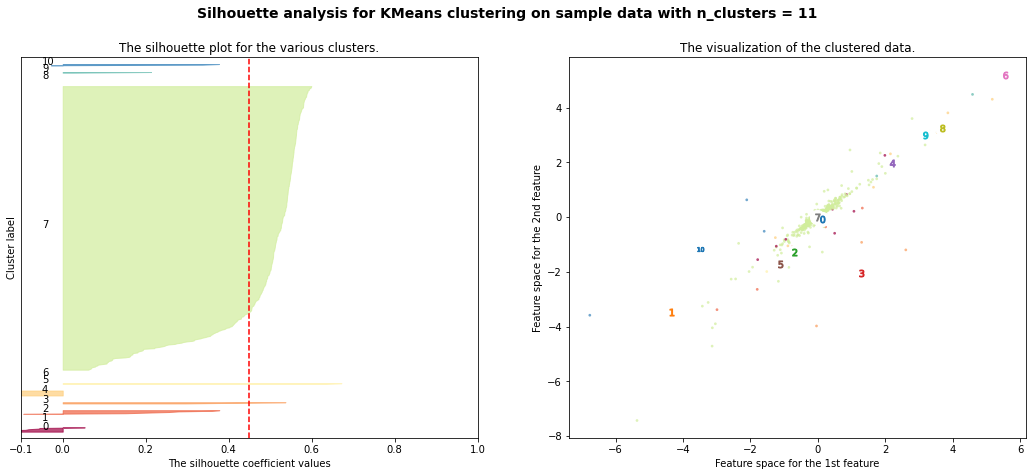

For n_clusters = 12 The average silhouette_score is : 0.45574809112931713


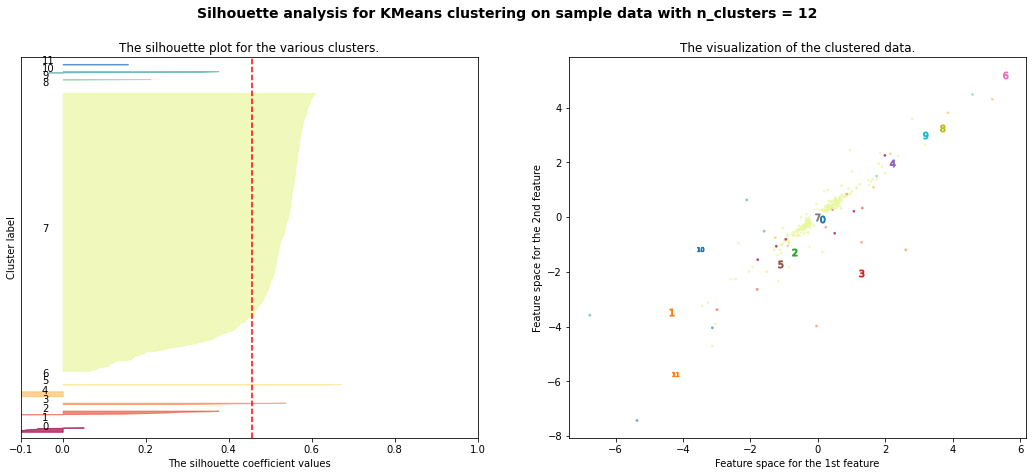

For n_clusters = 13 The average silhouette_score is : 0.4579100462780539


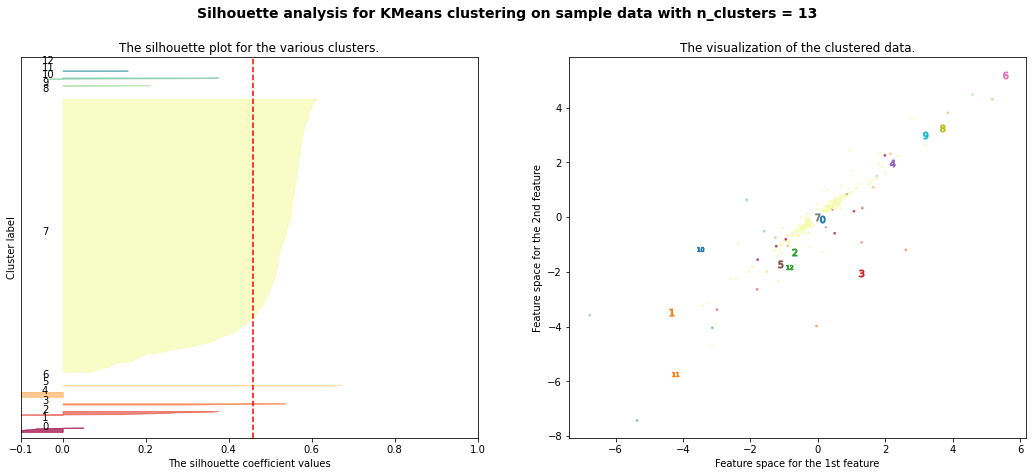

For n_clusters = 14 The average silhouette_score is : 0.4609655726465166


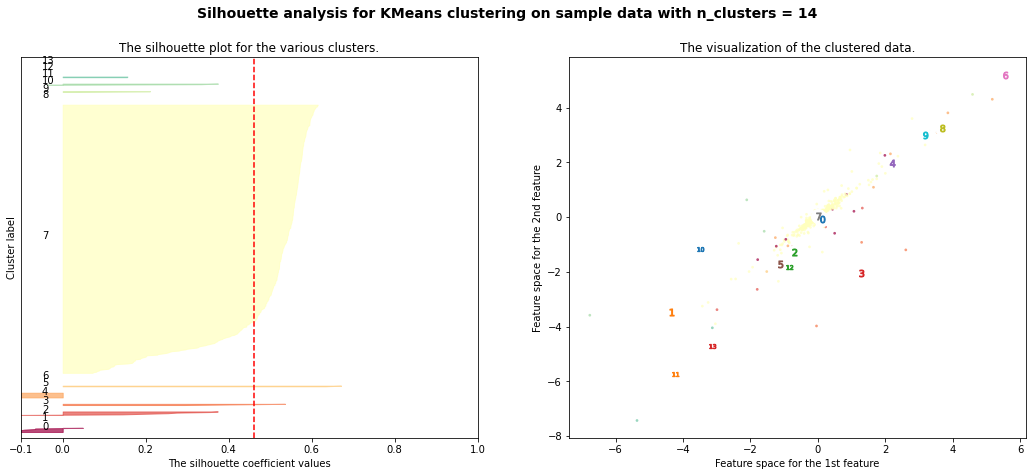

For n_clusters = 15 The average silhouette_score is : 0.16793402819226627


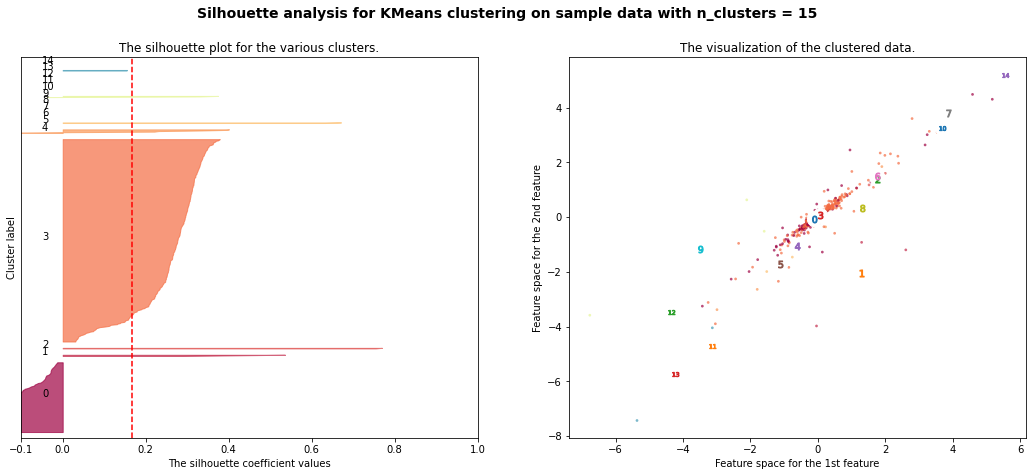

In [ ]:
from __future__ import print_function
%matplotlib inline


from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X=df_scaled.values

range_n_clusters = [2, 3, 4, 5, 6,7,8,9,10,11,12,13,14,15]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters,n_init=15, random_state=2)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.Spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.Spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

# Build a Dendogram

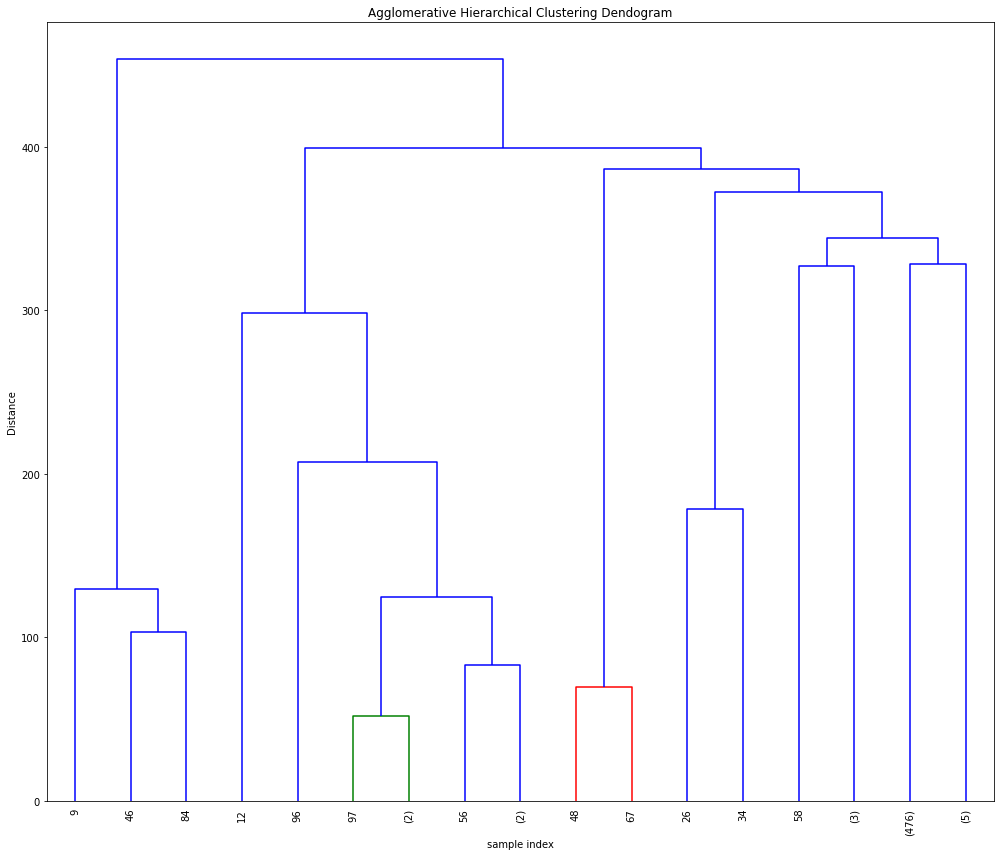

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
plt.figure(figsize=(14, 12))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
Z = linkage(df_scaled, 'ward')
dendrogram(Z,leaf_rotation=90.0,p=5,color_threshold=70,leaf_font_size=10,truncate_mode='level')
plt.tight_layout()